In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import numpy as np

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
supplierData = pd.read_csv('/content/drive/My Drive/cmpe256-data/uw-supplier-data-2.csv',low_memory=False)
supplierData.head()

,Supplier Name,Stage Invoked,Mandatory Restrictions,Reporting Month,REPORTED Total Monthly Potable Water,REPORTED Total Monthly Potable Water Production 2013,REPORTED Monthly CII,REPORTED Monthly Ag Use,REPORTED Monthly Ag Use 2013,REPORTED Recycled Water,REPORTED Units,Total Population Served,REPORTED Residential Gallons,Supplier has Agricultural Water,CALCULATED Total Monthly Potable Water Production,CALCULATED Total Monthly Potable Water Production 2013 Gallons,CALCULATED Monthly CII Reporting Month,CALCULATED R-GPCD Reporting Month,% Residential Use,Hydrologic Region,Water Days Allowed/Week,Follow-up Actions,Warnings Issued,Rate Penalties Assessed,Penalties Assessed
0,East Bay Municipal Utilities District,0,No,9/15/2019,5916.8,6528.4,1171,NaN,NaN,NaN,MG,"1,440,000",84.0,No,"5,916,800,000","6,528,400,000","1,171,000,000",83.5,61,San Francisco Bay,7,0,0,0,0
1,East Bay Municipal Utilities District,0,No,8/15/2019,6459.2,7172.3,1362.2,NaN,NaN,NaN,MG,"1,440,000",88.0,No,"6,459,200,000","7,172,300,000","1,362,200,000",88.3,61,San Francisco Bay,7,0,0,0,0
2,East Bay Municipal Utilities District,0,No,7/15/2019,6317.4,7452.2,1172,NaN,NaN,NaN,MG,"1,440,000",85.0,No,"6,317,400,000","7,452,200,000","1,172,000,000",84.9,60,San Francisco Bay,7,0,0,0,0
3,East Bay Municipal Utilities District,0,No,6/15/2019,5880.6,6927.5,901,NaN,NaN,NaN,MG,"1,440,000",82.0,No,"5,880,600,000","6,927,500,000","901,000,000",83.0,61,San Francisco Bay,7,0,0,0,0
4,East Bay Municipal Utilities District,0,No,5/15/2019,5203.6,6716.5,819,NaN,NaN,NaN,MG,"1,440,000",70.0,No,"5,203,600,000","6,716,500,000","819,000,000",69.9,60,San Francisco Bay,7,0,0,0,0


In [0]:
supplierData['YearMonth'] = pd.to_datetime(supplierData['Reporting Month'],format='%m/%d/%Y')
supplierData['ReportingYear'] = pd.to_datetime(supplierData['Reporting Month'],format='%m/%d/%Y').dt.year
supplierData['ReportingMonth'] = pd.to_datetime(supplierData['Reporting Month'],format='%m/%d/%Y').dt.month

In [71]:
supplierData['Total Population Served'] = supplierData['Total Population Served'].apply(lambda x: x.replace(',',''))
supplierData['Total Population Served']

0        1440000
1        1440000
2        1440000
3        1440000
4        1440000
          ...   
25205       8825
25206       8825
25207       8825
25208       8825
25209       8825
Name: Total Population Served, Length: 25210, dtype: object

In [0]:
supplierData['CALCULATED Total Monthly Potable Water Production'] = supplierData['CALCULATED Total Monthly Potable Water Production'].apply(lambda x:x.replace(',','')) 
supplierData['CALCULATED Total Monthly Potable Water Production 2013 Gallons'] = supplierData['CALCULATED Total Monthly Potable Water Production 2013 Gallons'].apply(lambda x:x.replace(',','')) 
supplierData['CALCULATED Monthly CII Reporting Month'] = supplierData['CALCULATED Monthly CII Reporting Month'].apply(lambda x:x.replace(',','')) 
supplierData['REPORTED Monthly Ag Use'].fillna(0)
supplierData['REPORTED Monthly Ag Use'] = supplierData['REPORTED Monthly Ag Use'].apply(lambda x : float(x) if (x != 'na' and x != 'not avail.') else 0)
supplierData['REPORTED Recycled Water'].fillna(0)
supplierData['REPORTED Recycled Water']= supplierData['REPORTED Recycled Water'].apply(lambda x : float(x) if x != 'na' else 0)
#supplierData['Hydrologic Region']= supplierData['Hydrologic Region'].apply(lambda x : float(x) if x != 'na' else 0)
#supplierData['Water Days Allowed/Week']= supplierData['Water Days Allowed/Week'].apply(lambda x : float(x) if x != 'na' else 0)
supplierData['CALCULATED Total Monthly Potable Water Production']= supplierData['CALCULATED Total Monthly Potable Water Production'].apply(lambda x : float(x) if x != ' Null ' else 0)
supplierData['CALCULATED Total Monthly Potable Water Production 2013 Gallons']= supplierData['CALCULATED Total Monthly Potable Water Production 2013 Gallons'].apply(lambda x : float(x) if x != ' Null ' else 0)
supplierData['CALCULATED Monthly CII Reporting Month']= supplierData['CALCULATED Monthly CII Reporting Month'].apply(lambda x : float(x) if x != ' Null ' else 0)
#supplierData['Supplier has Agricultural Water']= supplierData['Supplier has Agricultural Water'].apply(lambda x : float(x) if x != ' No ' else 0)
supplierData['REPORTED Monthly CII']= supplierData['REPORTED Monthly CII'].apply(lambda x : float(x) if (x != 'na' and x != 'uk' and x != 'not avail.') else 0)
supplierData['REPORTED Monthly Ag Use']= supplierData['REPORTED Monthly Ag Use'].apply(lambda x : float(x) if (x != 'na' and x != 'not avail.') else 0)
supplierData['REPORTED Monthly Ag Use 2013']= supplierData['REPORTED Monthly Ag Use 2013'].apply(lambda x : float(x) if x != 'na' else 0)
supplierData['Total Population Served'] = supplierData['Total Population Served'].apply(lambda x : float(x) if x != 'na' else 0)

In [73]:
supplierData['Hydrologic Region Codes'] = supplierData['Hydrologic Region'].astype('category').cat.codes
supplierData['Hydrologic Region Codes'].unique()

array([5, 0, 7, 6, 4, 1, 2, 9, 8, 3])

In [0]:
supplierData['Water Days Allowed/Week'] = supplierData['Water Days Allowed/Week'].astype('category').cat.codes
supplierData['Water Days Allowed/Week'].unique()

supplierData['Supplier has Agricultural Water'] = supplierData['Supplier has Agricultural Water'].astype('category').cat.codes
supplierData['REPORTED Recycled Water'] = supplierData['REPORTED Recycled Water'].fillna(0)
supplierData['REPORTED Monthly Ag Use'] = supplierData['REPORTED Monthly Ag Use'].fillna(0)

In [75]:
supplierData.head()

,Supplier Name,Stage Invoked,Mandatory Restrictions,Reporting Month,REPORTED Total Monthly Potable Water,REPORTED Total Monthly Potable Water Production 2013,REPORTED Monthly CII,REPORTED Monthly Ag Use,REPORTED Monthly Ag Use 2013,REPORTED Recycled Water,REPORTED Units,Total Population Served,REPORTED Residential Gallons,Supplier has Agricultural Water,CALCULATED Total Monthly Potable Water Production,CALCULATED Total Monthly Potable Water Production 2013 Gallons,CALCULATED Monthly CII Reporting Month,CALCULATED R-GPCD Reporting Month,% Residential Use,Hydrologic Region,Water Days Allowed/Week,Follow-up Actions,Warnings Issued,Rate Penalties Assessed,Penalties Assessed,YearMonth,ReportingYear,ReportingMonth,Hydrologic Region Codes
0,East Bay Municipal Utilities District,0,No,9/15/2019,5916.8,6528.4,1171.0,0.0,NaN,0.0,MG,1440000.0,84.0,0,5.916800e+09,6.528400e+09,1.171000e+09,83.5,61,San Francisco Bay,7,0,0,0,0,2019-09-15,2019,9,5
1,East Bay Municipal Utilities District,0,No,8/15/2019,6459.2,7172.3,1362.2,0.0,NaN,0.0,MG,1440000.0,88.0,0,6.459200e+09,7.172300e+09,1.362200e+09,88.3,61,San Francisco Bay,7,0,0,0,0,2019-08-15,2019,8,5
2,East Bay Municipal Utilities District,0,No,7/15/2019,6317.4,7452.2,1172.0,0.0,NaN,0.0,MG,1440000.0,85.0,0,6.317400e+09,7.452200e+09,1.172000e+09,84.9,60,San Francisco Bay,7,0,0,0,0,2019-07-15,2019,7,5
3,East Bay Municipal Utilities District,0,No,6/15/2019,5880.6,6927.5,901.0,0.0,NaN,0.0,MG,1440000.0,82.0,0,5.880600e+09,6.927500e+09,9.010000e+08,83.0,61,San Francisco Bay,7,0,0,0,0,2019-06-15,2019,6,5
4,East Bay Municipal Utilities District,0,No,5/15/2019,5203.6,6716.5,819.0,0.0,NaN,0.0,MG,1440000.0,70.0,0,5.203600e+09,6.716500e+09,8.190000e+08,69.9,60,San Francisco Bay,7,0,0,0,0,2019-05-15,2019,5,5


In [0]:
columns = ['Total Population Served','CALCULATED Total Monthly Potable Water Production']
supplierData_filtered = supplierData[columns]

In [77]:
supplierData_filtered['Total Population Served'].unique()

array([1440000., 1430000., 1410000., ...,   13498.,    9149.,    8825.])

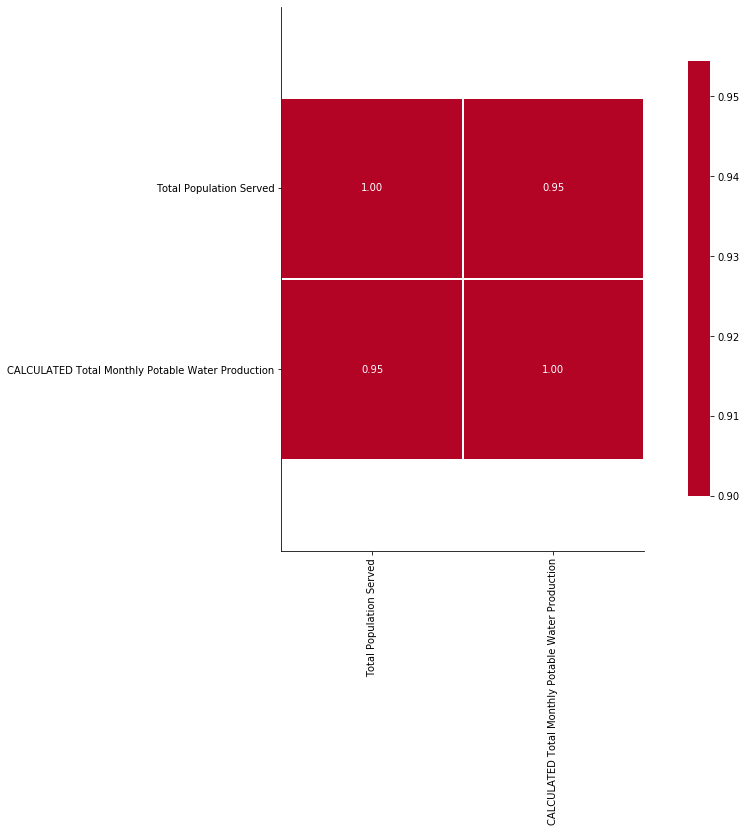

In [78]:
corr = supplierData_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

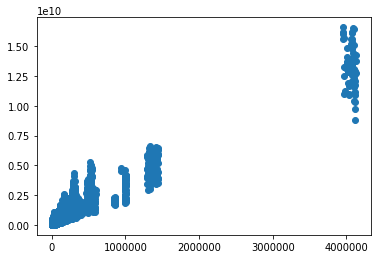

In [79]:
plt.scatter(supplierData_filtered['Total Population Served'],supplierData_filtered['CALCULATED Total Monthly Potable Water Production'])

In [0]:
sns.pairplot(supplierData)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1306: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [0]:
supplierData_filtered.dtypes

In [0]:
trainData, testData = train_test_split(supplierData_filtered, train_size=0.7, random_state=55)


In [0]:
Y_trainData = trainData['CALCULATED Total Monthly Potable Water Production']
X_trainData= trainData.drop('CALCULATED Total Monthly Potable Water Production', axis =1 )

Y_testData = testData['Total Population Served']
X_testData= testData.drop('Total Population Served', axis =1 )


In [0]:
y_test = np.asarray(Y_testData.values, dtype="float")



In [0]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
clf.fit(X_trainData, Y_trainData)
predictions = clf.predict(X_testData)

In [0]:
clf.score(X_trainData,Y_trainData)

In [0]:
clf.score(X_testData,Y_testData)

In [0]:

pred = np.asarray(predictions, dtype="float")
pred

In [0]:
Y_testData.values

In [0]:
predictions

In [0]:
foo = clf.predict([[3.22200000e+07]])
foo